In [1]:
from src import *
import random





In [2]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx

In [3]:
d = Diamond((3,3))

In [4]:
d.neighbours


{(0, 0): [(0, 1), (1, 0)],
 (0, 1): [(0, 0), (0, 2), (1, 0), (1, 1)],
 (0, 2): [(0, 1), (1, 1), (1, 2)],
 (1, 0): [(0, 0), (0, 1), (1, 1), (2, 0)],
 (1, 1): [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)],
 (1, 2): [(0, 2), (1, 1), (2, 1), (2, 2)],
 (2, 0): [(1, 0), (1, 1), (2, 1)],
 (2, 1): [(1, 1), (1, 2), (2, 0), (2, 2)],
 (2, 2): [(1, 2), (2, 1)]}

In [5]:
d.cells

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [3]:
env = Nim(n=4, k=2)

In [4]:
class target_pol:
    def get_action(self, env):
        return random.choice(env.available_actions())
    
t = target_pol()
t.get_action(env)

1

In [10]:
random.seed(0)
env = Nim(n=2, k=2)
mcts = MCTS(target_pol(), env)
mcts.search(30, c=1, old=False)

AttributeError: 'target_pol' object has no attribute 'get_actions'

In [6]:
G, edge_labels = mcts.visualize_tree_nim()

children:  [<src.node.Node object at 0x13d258ca0>, <src.node.Node object at 0x13d258220>]
er her
remianing- child.action 0
er her
remianing- child.action 1
children:  [<src.node.Node object at 0x13d258880>]
er her
remianing- child.action 0
unique labels:  2


In [7]:
len(G.nodes())

4

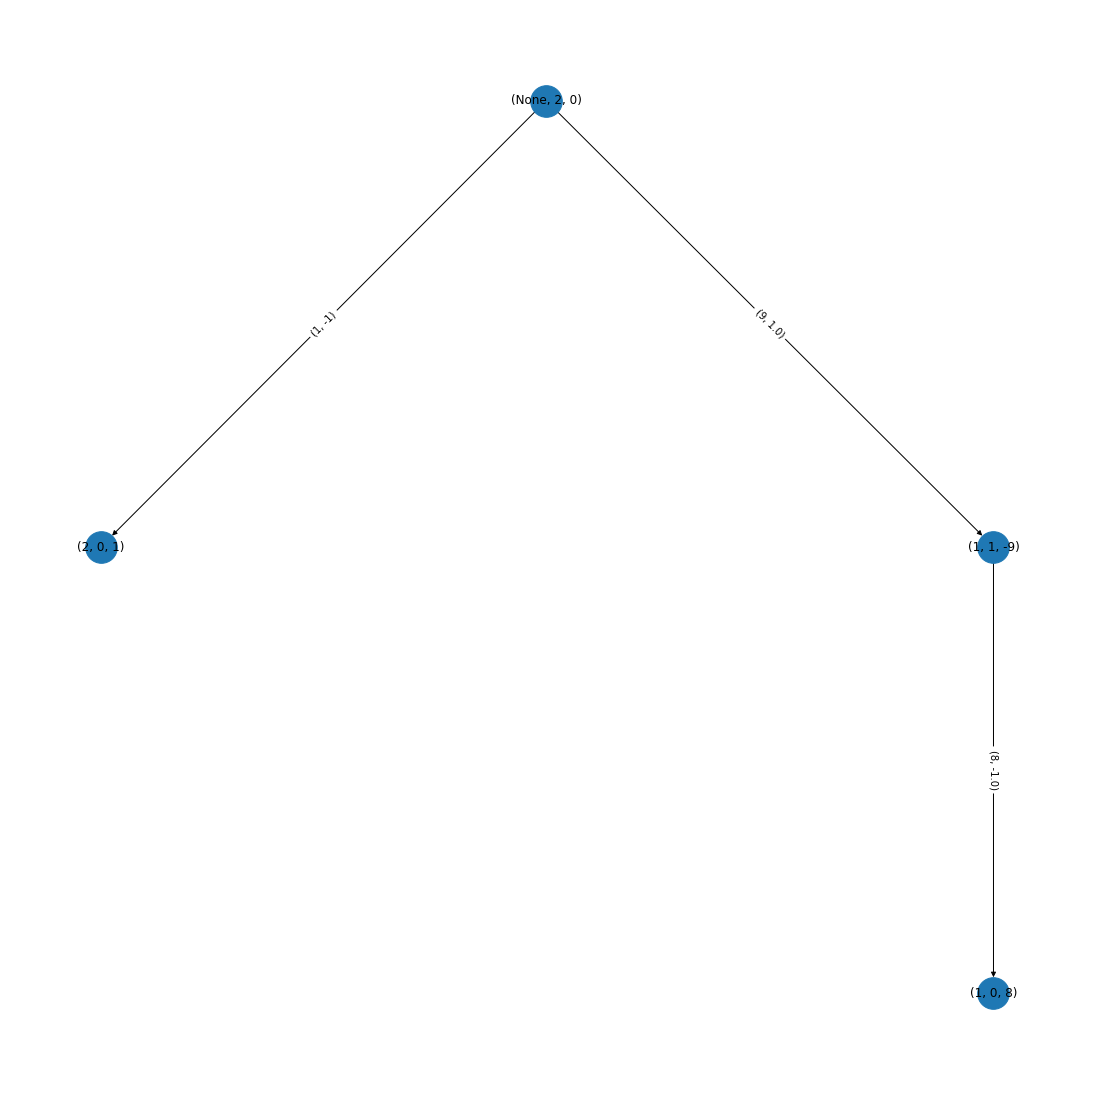

In [8]:
plt.figure(figsize=(15,15))
pos = graphviz_layout(G, prog='dot')
labels = {node:(node[0], node[1], node[2]) for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [23]:
mcts.set_new_root(2)

In [24]:
G, edge_labels = mcts.visualize_tree_nim()

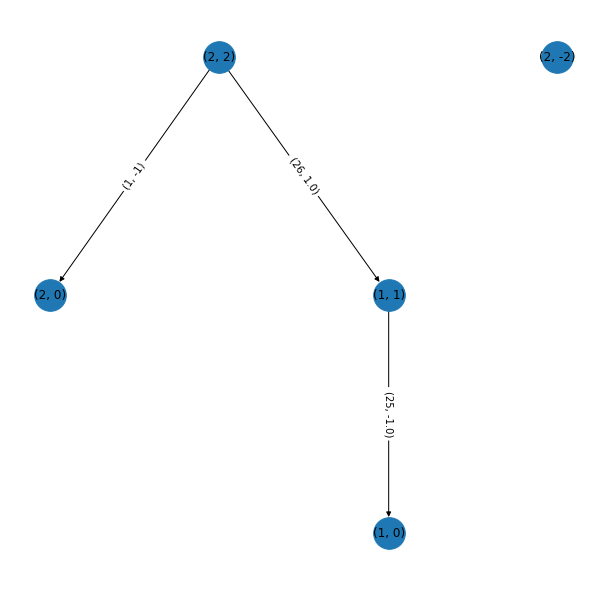

In [25]:
plt.figure(figsize=(8,8))
pos = graphviz_layout(G, prog='dot')
labels = {node:(node[0], node[1]) for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [26]:
random.seed(0)
mcts.search(25)


{2: 0.019230769230769232, 1: 0.9807692307692308}

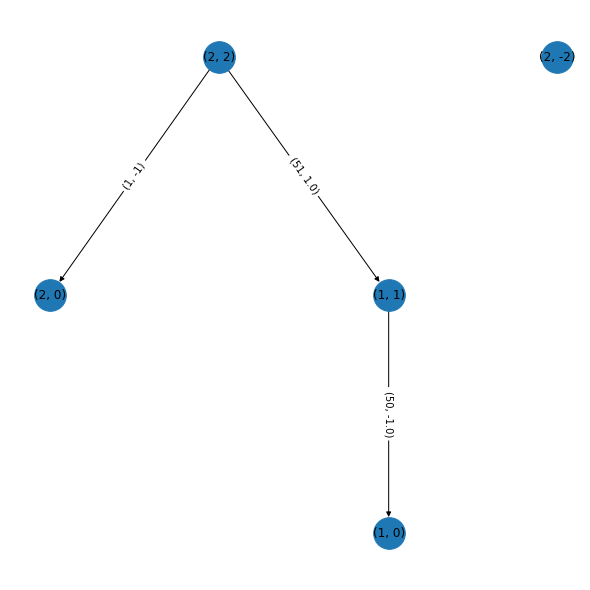

In [27]:
G, edge_labels = mcts.visualize_tree_nim()
plt.figure(figsize=(8,8))
pos = graphviz_layout(G, prog='dot')
labels = {node:(node[0], node[1]) for node in G.nodes()}
nx.draw(G, pos=pos,node_size=1000, labels=labels)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [ ]:
e = Hex((4,4))


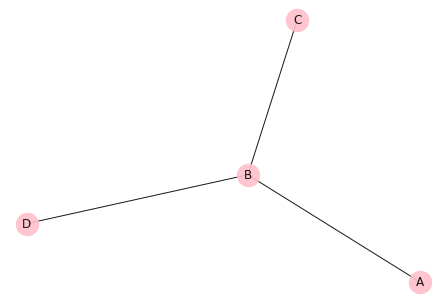

In [14]:
edges = [['A','B'],['B','C'],['B','D']]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
plt.figure()    
nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=500,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()})





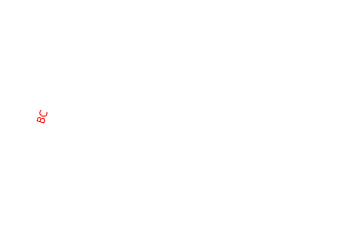

In [15]:
nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
('B','C'):'BC',('B','D'):'BD'},font_color='red')
plt.axis('off')
plt.show()

In [24]:
mcts.perform_simulation()

actions: [1]


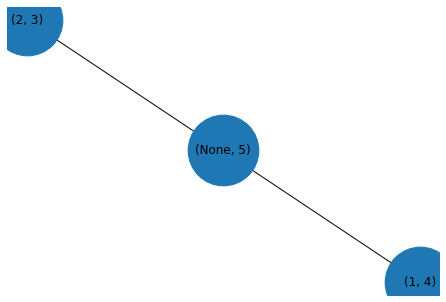

In [11]:
mcts.visualize_tree()

In [5]:
mcts.search(10)

actions: [1, 2]
actions: [2]
actions: [1, 2]
actions: [2]
actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [2]
actions: [1]


{1: 0.9, 2: 0.1}

In [6]:
env.make_action(1)
mcts.set_new_root(1)

In [7]:
mcts.search(10)

actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [2]
actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [2]


{1: 0.8333333333333333, 2: 0.16666666666666666}

In [8]:
env.make_action(1)
mcts.set_new_root(1)

In [9]:
mcts.search(10)

actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [1, 2]
actions: [1]
actions: [1]
actions: [1, 2]
actions: [1]
actions: [1]


{2: 0.875, 1: 0.125}

In [10]:
env.make_action(2)
mcts.set_new_root(2)

In [11]:
mcts.search(10)

actions: [1, 2]
actions: [1]
actions: [1, 2]
actions: [1, 2]
actions: [1, 2]
actions: [1, 2]
actions: [2]
actions: [1, 2]
actions: [2]
actions: [2]


{2: 0.5, 1: 0.5}

In [28]:
env.remaining

1

In [29]:
env.available_actions()

[1]

In [37]:
h = Hex((3,3))
encoder = HexEncoder(padding=2)
h.set_encoder(encoder)
actor = Actor(learning_rate=0.01,
             epsilon=0,
             end_epsilon=0,
              encoder=encoder,
               load_from='Models/newtest_3_3_200.h5'
             )

mcts = MCTS(actor, h)


In [38]:
%time mcts.search(100, old=True, rollout_batch_size = 1)

CPU times: user 1.61 s, sys: 17 ms, total: 1.63 s
Wall time: 1.89 s


{(1, 1): 0.67,
 (1, 2): 0.01,
 (0, 2): 0.01,
 (1, 0): 0.01,
 (2, 2): 0.07,
 (2, 1): 0.2,
 (2, 0): 0.01,
 (0, 0): 0.01,
 (0, 1): 0.01}

In [39]:
import cProfile

In [40]:
cProfile.run('mcts.search(100, old=True, rollout_batch_size = 1)', sort='cumtime')

         1921879 function calls (1919035 primitive calls) in 2.789 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    2.805    2.805 {built-in method builtins.exec}
        1    0.000    0.000    2.805    2.805 <string>:1(<module>)
        1    0.000    0.000    2.805    2.805 monte_carlo_ts.py:189(search)
      100    0.001    0.000    2.805    0.028 monte_carlo_ts.py:170(perform_simulation_old)
      100    0.004    0.000    2.137    0.021 monte_carlo_ts.py:78(_rollout)
      316    0.010    0.000    1.275    0.004 actor.py:59(get_action)
 1896/316    0.092    0.000    1.238    0.004 base_layer.py:901(__call__)
      200    0.005    0.000    1.110    0.006 hex.py:84(copy)
      316    0.001    0.000    1.097    0.003 sequential.py:354(call)
      316    0.002    0.000    1.095    0.003 functional.py:406(call)
      316    0.042    0.000    1.093    0.003 functional.py:516(_run_internal_graph)

In [41]:
cProfile.run('mcts.perform_simulation_old()', sort='cumtime')

         22810 function calls (22765 primitive calls) in 0.052 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.052    0.052 {built-in method builtins.exec}
        1    0.000    0.000    0.052    0.052 <string>:1(<module>)
        1    0.000    0.000    0.052    0.052 monte_carlo_ts.py:170(perform_simulation_old)
        1    0.000    0.000    0.038    0.038 monte_carlo_ts.py:78(_rollout)
        2    0.000    0.000    0.024    0.012 hex.py:84(copy)
        2    0.000    0.000    0.024    0.012 hex.py:74(set_encoder)
        2    0.000    0.000    0.024    0.012 encoder.py:248(encode)
        5    0.000    0.000    0.022    0.004 actor.py:59(get_action)
     30/5    0.001    0.000    0.021    0.004 base_layer.py:901(__call__)
      624    0.005    0.000    0.020    0.000 encoder.py:134(_coordinate_bridge_encoding)
       12    0.001    0.000    0.020    0.002 encoder.py:118(bridge_encoding

       15    0.000    0.000    0.000    0.000 base_layer.py:879(compute_mask)
        1    0.000    0.000    0.000    0.000 random.py:250(_randbelow_with_getrandbits)
       18    0.000    0.000    0.000    0.000 encoder.py:36(<lambda>)
       10    0.000    0.000    0.000    0.000 {method 'get' of 'dict' objects}
        5    0.000    0.000    0.000    0.000 {method 'random' of '_random.Random' objects}
        1    0.000    0.000    0.000    0.000 node.py:28(set_parent)
        5    0.000    0.000    0.000    0.000 resource_variable_ops.py:528(shape)
        8    0.000    0.000    0.000    0.000 {built-in method builtins.issubclass}
        8    0.000    0.000    0.000    0.000 multiarray.py:143(concatenate)
        5    0.000    0.000    0.000    0.000 encoder.py:25(get_encoding)
        5    0.000    0.000    0.000    0.000 {method 'endswith' of 'str' objects}
        5    0.000    0.000    0.000    0.000 tensor_shape.py:792(_v2_behavior)
        1    0.000    0.000    0.000    0.0

In [34]:
actor.model(encoder.encode(h))

<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
array([[0.07182256, 0.12978803, 0.21481715, 0.02358716, 0.17396975,
        0.03548274, 0.0082499 , 0.301651  , 0.04063172]], dtype=float32)>

In [35]:
actor.get_action(h)

(2, 1)

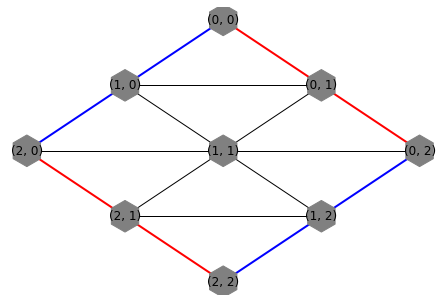

In [7]:
h.display_board()

In [13]:
visited = []
to_visit = [mcts.root]

while len(to_visit)>0:
    current = to_visit.pop()
    visited.append(current)
    to_visit+= current.get_children()
    
len(visited)


2

In [74]:
h = Hex((6,6))
%time h.copy()

CPU times: user 294 µs, sys: 11 µs, total: 305 µs
Wall time: 310 µs


In [75]:
a = np.arange(36).reshape((6,6))
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [76]:
%time np.copy(a)

CPU times: user 25 µs, sys: 5 µs, total: 30 µs
Wall time: 35 µs


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [77]:
%time np.array(a, copy=True)

CPU times: user 25 µs, sys: 7 µs, total: 32 µs
Wall time: 38.9 µs


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])